In [61]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import RegexpTokenizer
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect(r'C:\Users\Sundas.Mohsin\Desktop\Portfolio Projects\Resources\zomato_rawdata.sqlite')

In [11]:
df = pd.read_sql_query('select * from users',conn)
df.shape

(51717, 18)

In [4]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
np.round(df.isnull().sum() / len(df) * 100,2)

index                           0.00
url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df['rate'].replace(to_replace=['NEW', '-'], value=np.nan, inplace=True)

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [16]:
df['rate'].isnull().sum()

10052

In [17]:
newdf = df.dropna()

In [18]:
pT = pd.crosstab(newdf['rate'], newdf['online_order'])
pT

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,27,18
2.4,20,34
2.5,33,24
2.6,56,82
2.7,91,99


<Axes: xlabel='rate'>

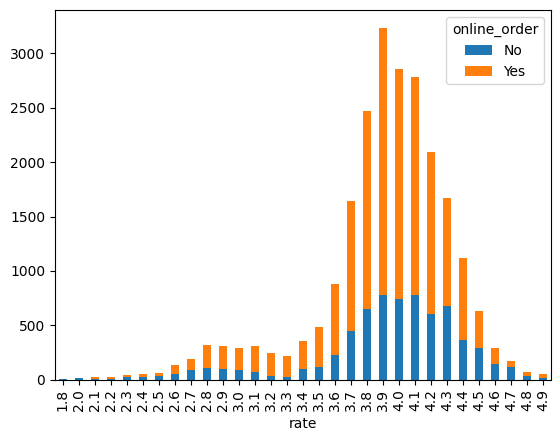

In [19]:
pT.plot(kind='bar', stacked=True)

In [20]:
pT.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      45.0
2.4      54.0
2.5      57.0
2.6     138.0
2.7     190.0
2.8     315.0
2.9     309.0
3.0     291.0
3.1     307.0
3.2     249.0
3.3     218.0
3.4     351.0
3.5     482.0
3.6     875.0
3.7    1639.0
3.8    2473.0
3.9    3238.0
4.0    2860.0
4.1    2786.0
4.2    2097.0
4.3    1671.0
4.4    1123.0
4.5     630.0
4.6     294.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [21]:
normalized = pT.div(pT.sum(axis=1).astype(float), axis=0)

In [22]:
normalized = normalized * 100

<Axes: xlabel='rate'>

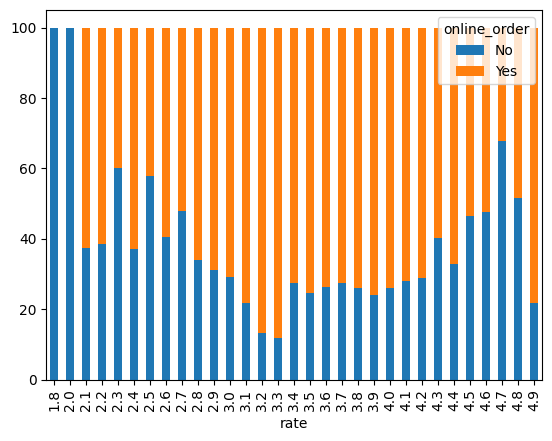

In [23]:
normalized.plot(kind='bar', stacked=True)

In [43]:
newdf['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway, Delivery', 'Food Truck', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar', 'Bakery', 'Sweet Shop',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Microbrewery, Casual Dining', 'Sweet Shop, Quick Bites', 'Lounge',
       'Food Court', 'Cafe, Bakery', 'Microbrewery', 'Kiosk', 'Pub, Bar',
       'Casual Dining, Pub', 'Cafe, Quick Bites', 'Lounge, Bar',
       'Bakery, Quick Bites', 'Dessert Parlor, Quick Bites',
       'Bar, Casual Dining', 'Beverage Shop, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Mess', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Dessert Parlor, Cafe',
       'Bakery, Dessert Parlor', 'Quick Bites, Sweet Shop', 'Takeaway',
       'Microbrewery, Pub', 'Club', 'Fine Dining', 'Baker

In [55]:
print('Dining: ', newdf['rest_type'].str.contains('Dining').sum())
print('Food: ', newdf['rest_type'].str.contains('Food').sum())
print('Bakery: ', newdf['rest_type'].str.contains('Bakery').sum())

Dining:  10013
Food:  276
Bakery:  569


In [53]:
newdf['rest_type'].value_counts()

rest_type
Casual Dining                7298
Quick Bites                  5224
Cafe                         2321
Dessert Parlor               1074
Casual Dining, Bar            980
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: count, Length: 73, dtype: int64

<Axes: xlabel='rest_type'>

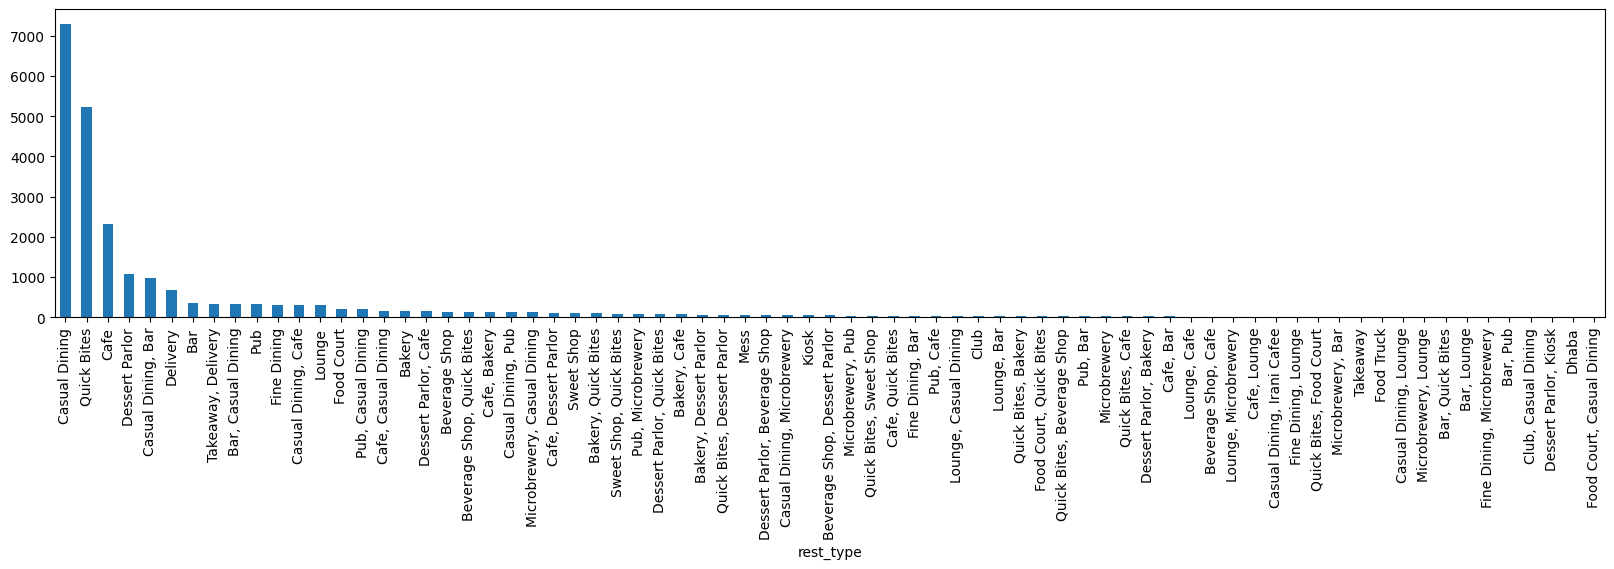

In [62]:
plt.figure(figsize=(20,4))
newdf['rest_type'].value_counts().plot(kind='bar',stacked=True)

In [64]:
cd= newdf[newdf['rest_type'].str.contains('Casual Dining')]
len(cd)

9642

In [65]:
cd.shape

(9642, 18)

In [66]:
cd.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [67]:
cd['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
5        [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...
                               ...                        
51703    [('Rated 4.0', "RATED\n  I had :-\n\n1. Italia...
51704    [('Rated 3.0', 'RATED\n  Like this place for z...
51705    [('Rated 3.0', "RATED\n  Nice place to hangout...
51708    [('Rated 3.0', 'RATED\n  Place is good not tha...
51711    [('Rated 4.0', 'RATED\n  A fine place to chill...
Name: reviews_list, Length: 9642, dtype: object

In [68]:
cd['reviews_list'] = cd['reviews_list'].apply(lambda x: x.lower())

C:\Users\Sundas.Mohsin\AppData\Local\Temp\ipykernel_10936\2128373326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['reviews_list'] = cd['reviews_list'].apply(lambda x: x.lower())


In [69]:
cd['reviews_list']

0        [('rated 4.0', 'rated\n  a beautiful place to ...
1        [('rated 4.0', 'rated\n  had been here for din...
2        [('rated 3.0', "rated\n  ambience is not that ...
4        [('rated 4.0', 'rated\n  very good restaurant ...
5        [('rated 3.0', 'rated\n  food 3/5\nambience 3/...
                               ...                        
51703    [('rated 4.0', "rated\n  i had :-\n\n1. italia...
51704    [('rated 3.0', 'rated\n  like this place for z...
51705    [('rated 3.0', "rated\n  nice place to hangout...
51708    [('rated 3.0', 'rated\n  place is good not tha...
51711    [('rated 4.0', 'rated\n  a fine place to chill...
Name: reviews_list, Length: 9642, dtype: object

In [70]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [73]:
cd['reviews_list']

0        [('rated 4.0', 'rated\n  a beautiful place to ...
1        [('rated 4.0', 'rated\n  had been here for din...
2        [('rated 3.0', "rated\n  ambience is not that ...
4        [('rated 4.0', 'rated\n  very good restaurant ...
5        [('rated 3.0', 'rated\n  food 3/5\nambience 3/...
                               ...                        
51703    [('rated 4.0', "rated\n  i had :-\n\n1. italia...
51704    [('rated 3.0', 'rated\n  like this place for z...
51705    [('rated 3.0', "rated\n  nice place to hangout...
51708    [('rated 3.0', 'rated\n  place is good not tha...
51711    [('rated 4.0', 'rated\n  a fine place to chill...
Name: reviews_list, Length: 9642, dtype: object

In [ ]:
tokenizer.tokenize(cd['reviews_list'][3])

In [74]:
tokens = cd['reviews_list'].apply(tokenizer.tokenize)
tokens

0        [rated, rated, n, a, beautiful, place, to, din...
1        [rated, rated, n, had, been, here, for, dinner...
2        [rated, rated, n, ambience, is, not, that, goo...
4        [rated, rated, n, very, good, restaurant, in, ...
5        [rated, rated, n, food, nambience, nservice, n...
                               ...                        
51703    [rated, rated, n, i, had, n, n, italian, tiram...
51704    [rated, rated, n, like, this, place, for, zoma...
51705    [rated, rated, n, nice, place, to, hangout, wi...
51708    [rated, rated, n, place, is, good, not, that, ...
51711    [rated, rated, n, a, fine, place, to, chill, a...
Name: reviews_list, Length: 9642, dtype: object

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sundas.Mohsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
from nltk.corpus import stopwords

In [77]:
stop = stopwords.words('english')

In [78]:
stop.extend(['rated', 'n', 'nan', 'x', 'RATED', 'Rated'])

In [79]:
clean_reviews = tokens.apply(lambda each_review: [t for t in each_review if t not in stop])


In [80]:
clean_reviews

0        [beautiful, place, dine, interiors, take, back...
1        [dinner, family, turned, good, choose, suitabl...
2        [ambience, good, enough, pocket, friendly, caf...
4        [good, restaurant, neighbourhood, buffet, syst...
5        [food, nambience, nservice, nhad, family, lunc...
                               ...                        
51703    [italian, tiramisu, shake, grilled, one, burge...
51704    [like, place, zomato, gold, drinks, whenever, ...
51705    [nice, place, hangout, kids, one, part, iona, ...
51708    [place, good, great, food, good, spicy, taste,...
51711    [fine, place, chill, office, hours, reasonably...
Name: reviews_list, Length: 9642, dtype: object

In [81]:
tot_reviews = list(clean_reviews)

words = []
for review in tot_reviews:
    for word in review:
        words.append(word)



In [82]:
words

['beautiful',
 'place',
 'dine',
 'interiors',
 'take',
 'back',
 'mughal',
 'era',
 'lightings',
 'perfect',
 'went',
 'occasion',
 'christmas',
 'limited',
 'items',
 'available',
 'taste',
 'service',
 'compromised',
 'complaint',
 'breads',
 'could',
 'better',
 'would',
 'surely',
 'like',
 'come',
 'dinner',
 'family',
 'weekday',
 'restaurant',
 'completely',
 'empty',
 'ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'seating',
 'arrangement',
 'good',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'food',
 'fresh',
 'good',
 'service',
 'good',
 'good',
 'family',
 'hangout',
 'ncheers',
 'restaurant',
 'near',
 'banashankari',
 'bda',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'inquiring',
 'said',
 'place',
 'mostly',
 'visited',
 'vegetarians',
 'anyways',
 'ordered',
 'ala',
 'carte',
 '

In [83]:
from nltk import FreqDist

fd = FreqDist()

for word in words:
    fd[word] = fd[word] + 1

In [84]:
fd.most_common(20)

[('place', 439949),
 ('good', 430406),
 ('food', 427592),
 ('chicken', 194871),
 ('service', 167406),
 ('ambience', 142346),
 ('great', 131409),
 ('ordered', 124752),
 ('one', 115908),
 ('really', 115275),
 ('taste', 100540),
 ('also', 99631),
 ('try', 99193),
 ('nice', 97666),
 ('time', 93236),
 ('visit', 92620),
 ('nthe', 88712),
 ('restaurant', 86361),
 ('staff', 86276),
 ('like', 84671)]

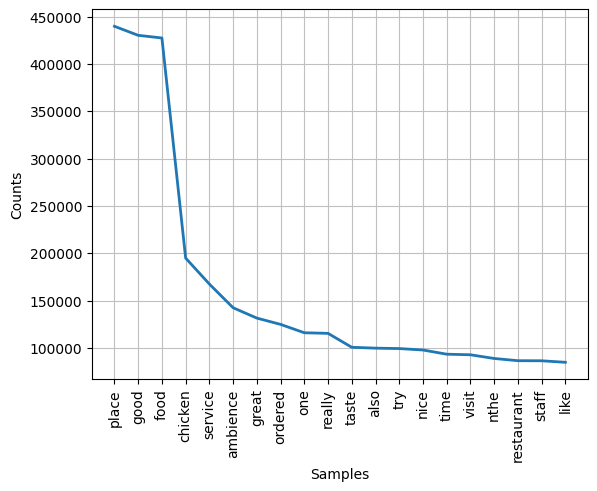

<Axes: xlabel='Samples', ylabel='Counts'>

In [85]:
fd.plot(20)

Performing Bigram and Trigram 

In [89]:
from nltk import FreqDist, bigrams, trigrams

biGrams = bigrams(words)
biGrams

<generator object bigrams at 0x00000170E4B23760>

In [91]:
fd_biGrams = FreqDist()

for b in biGrams:
    fd_biGrams[b] = fd_biGrams[b] + 1

fd_biGrams.most_common(10)

[(('really', 'good'), 31900),
 (('main', 'course'), 28574),
 (('must', 'try'), 28373),
 (('good', 'food'), 27807),
 (('food', 'good'), 27434),
 (('good', 'place'), 23605),
 (('visit', 'place'), 22245),
 (('non', 'veg'), 21594),
 (('one', 'best'), 18000),
 (('f', 'f'), 17623)]

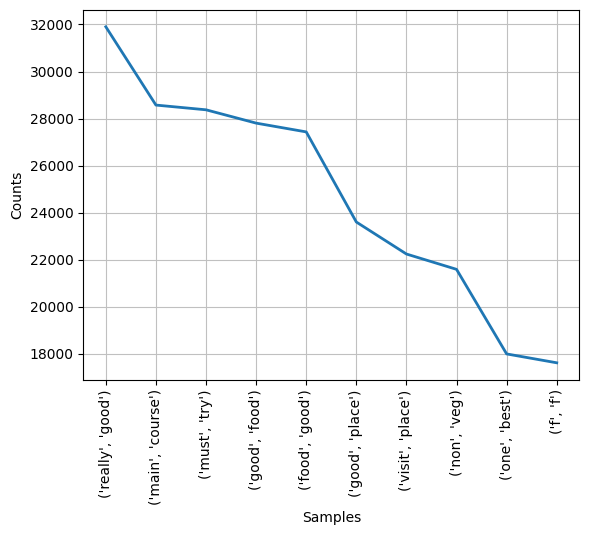

<Axes: xlabel='Samples', ylabel='Counts'>

In [92]:
fd_biGrams.plot(10)

In [93]:
tiGrams = trigrams(words)

In [94]:
fd_tiGrams = FreqDist()

for b in tiGrams:
    fd_tiGrams[b] = fd_tiGrams[b] + 1

In [95]:
fd_tiGrams.most_common(10)

[(('f', 'f', 'f'), 9372),
 (('veg', 'non', 'veg'), 6522),
 (('must', 'visit', 'place'), 5916),
 (('north', 'indian', 'food'), 5377),
 (('food', 'really', 'good'), 3938),
 (('starters', 'main', 'course'), 3211),
 (('nfood', 'nambience', 'nservice'), 3200),
 (('place', 'hangout', 'friends'), 3034),
 (('overall', 'good', 'experience'), 3014),
 (('peri', 'peri', 'chicken'), 2860)]

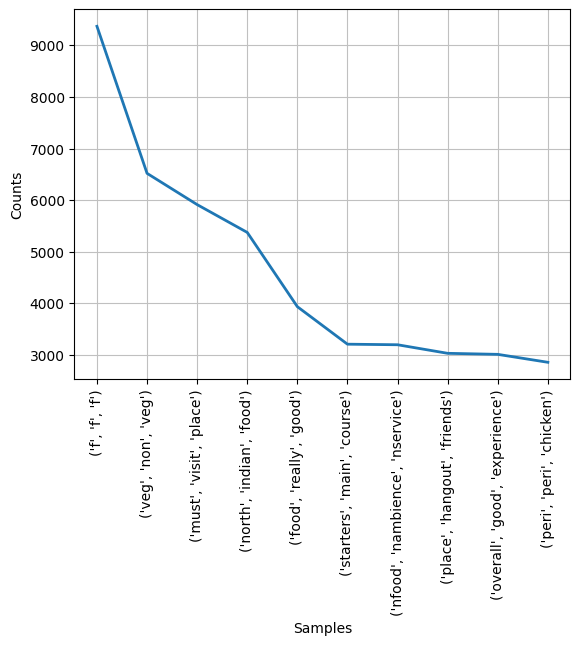

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
fd_tiGrams.plot(10)

Extracting Geographical Coordinates

In [97]:
!pip install geocoder
!pip install geopy

In [144]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,"Banashankari, Bangalore, Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [99]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [100]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [102]:
len(df['location'].unique())

94

In [101]:
df['location'] = df['location'] + ', Bangalore, Karnataka, India'

In [103]:
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [145]:
dfcopy = df.copy()

In [146]:
dfcopy['location'].isnull().sum()

0

In [147]:
ldf = dfcopy.dropna(subset=['location'])

In [149]:
locations = pd.DataFrame()
locations['Locations'] = pd.DataFrame(ldf['location'].unique())
locations.head(5)

,Locations
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"


In [150]:
from geopy.geocoders import Nominatim

geoLocator = Nominatim(user_agent='app', timeout=None)

In [151]:
lat = []
lon = []
# using geocode to save certain location latitude and longitude values
for location in locations['Locations']:
    location = geoLocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)



In [152]:
locations['latitude'] = lat
locations['longitude'] = lon

locations.head(3)

,Locations,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946703,77.530070


Creating Geographical Heatmaps

In [114]:
locations.isnull().sum()

Locations    0
latitude     2
longitude    2
dtype: int64

In [115]:
locations[locations['latitude'].isna()]


,Locations,latitude,longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [116]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [117]:
locations['latitude'][45] = 12.9764122
locations['longitude'][45] = 77.6017437

locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [127]:
locations.head(3)

,Locations,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946703,77.530070


In [118]:
df['cuisines'].isnull().sum()

45

In [119]:
df = df.dropna(subset=['cuisines'])

In [120]:
northIndia = df[df['cuisines'].str.contains('North Indian')]

In [121]:
northIndia.shape

(21085, 18)

In [129]:
restCount = northIndia['location'].value_counts().reset_index().rename(columns={'location':'Locations'})
restCount

,Locations,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [153]:
heatmap_df = restCount.merge(locations, on='Locations', how='left')
heatmap_df.head(20)

,Locations,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.915149,77.585702
5,"Koramangala 5th Block, Bangalore, Karnataka, I...",755,12.934843,77.618977
6,"Bannerghatta Road, Bangalore, Karnataka, India",701,12.908819,77.600320
7,"Indiranagar, Bangalore, Karnataka, India",678,12.973291,77.640467
8,"Electronic City, Bangalore, Karnataka, India",675,12.848760,77.648253
9,"Jayanagar, Bangalore, Karnataka, India",664,12.929273,77.582423


In [ ]:
!pip install folium

In [141]:
import folium
from folium.plugins import HeatMap

def getHeatmap (reqCuisine):
    cuisine_df = df[df['cuisines'].str.contains(reqCuisine)]
    c_restCount = cuisine_df['location'].value_counts().reset_index().rename(columns={'location':'Locations'})
    c_heatmap_df = c_restCount.merge(locations, on='Locations', how='left')
    bMap = folium.Map()
    HeatMap(c_heatmap_df[['latitude', 'longitude', 'count']]).add_to(bMap)
    return bMap



In [137]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [140]:
getHeatmap('South Indian')